**1. (i) 다음은 합성곱 클래스의 순전파 코드이다.
편향이 $b_1=1$, $b_2=2$로 주어져 있다.
13강 연습문제 1번에 다음 코드를 적용했을 때 밑줄친 4개의 값을 손으로 구하시오.**

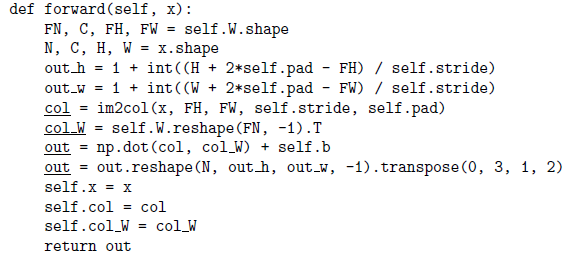

13강 연습문제 1번에서 데이터와 필터는
$$
X=
\begin{pmatrix}
\begin{pmatrix}
1&0&1 \\
0&1&0 \\
1&0&1
\end{pmatrix}
&
\begin{pmatrix}
1&1&1 \\
1&0&1 \\
1&1&1
\end{pmatrix} \\
\begin{pmatrix}
1&1&1 \\
1&0&0 \\
1&0&0
\end{pmatrix}
&
\begin{pmatrix}
0&0&1 \\
0&0&1 \\
1&1&1
\end{pmatrix}
\end{pmatrix}
, \qquad
W=
\begin{pmatrix}
\begin{pmatrix}
1&0 \\
1&0
\end{pmatrix}
&
\begin{pmatrix}
1&1 \\
0&0
\end{pmatrix} \\
\begin{pmatrix}
0&1 \\
0&1
\end{pmatrix}
&
\begin{pmatrix}
0&0 \\
1&1
\end{pmatrix}
\end{pmatrix}
$$
와 같이 주어져 있습니다.  
데이터에 im2col을 적용하면 합성곱할때 필터위치의 데이터를 flatten합니다.
$$
col=
\begin{pmatrix}
1&0&0&1&1&1&1&0\\
0&1&1&0&1&1&0&1\\
0&1&1&0&1&0&1&1\\
1&0&0&1&0&1&1&1\\
1&1&1&0&0&0&0&0\\
1&1&0&0&0&1&0&1\\
1&0&1&0&0&0&1&1\\
0&0&0&0&0&1&1&1
\end{pmatrix}
$$
두 필터를 각각 flatten해서 행렬의 열에 채워 넣습니다.
$$
col_W=
\begin{pmatrix}
1&0\\
0&1\\
1&0\\
0&1\\
1&0\\
1&0\\
0&1\\
0&1
\end{pmatrix}
$$
두 행렬을 곱하고 편향을 브로드캐스팅으로 더합니다.
$$
out = col \times col_W +b =
\begin{pmatrix}
1&0&0&1&1&1&1&0\\
0&1&1&0&1&1&0&1\\
0&1&1&0&1&0&1&1\\
1&0&0&1&0&1&1&1\\
1&1&1&0&0&0&0&0\\
1&1&0&0&0&1&0&1\\
1&0&1&0&0&0&1&1\\
0&0&0&0&0&1&1&1
\end{pmatrix}
\begin{pmatrix}
1&0\\
0&1\\
1&0\\
0&1\\
1&0\\
1&0\\
0&1\\
0&1
\end{pmatrix}
+[1,2]=
\begin{pmatrix}
4&4\\
4&4\\
3&5\\
3&5\\
3&3\\
3&4\\
3&4\\
2&4
\end{pmatrix}
$$
N$\times$OH$\times$OW$\times$FN = 2$\times$2$\times$2$\times$2로 reshape을 합니다.  
$$
out=
\begin{pmatrix}
\begin{pmatrix}
4&4 \\
4&4
\end{pmatrix}
&
\begin{pmatrix}
3&5 \\
3&5
\end{pmatrix} \\
\begin{pmatrix}
3&3 \\
3&4
\end{pmatrix}
&
\begin{pmatrix}
3&4 \\
2&4
\end{pmatrix}
\end{pmatrix}
$$
transpose(0,3,1,2)를 적용합니다.  
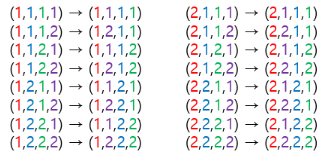
$$
out=
\begin{pmatrix}
\begin{pmatrix}
4&4 \\
3&3
\end{pmatrix}
&
\begin{pmatrix}
4&4 \\
5&5
\end{pmatrix} \\
\begin{pmatrix}
3&3 \\
3&2
\end{pmatrix}
&
\begin{pmatrix}
3&4 \\
4&4
\end{pmatrix}
\end{pmatrix}
$$
최종값은 13강 연습문제 1번에서 구한 4차원 텐서
$$
\begin{pmatrix}
\begin{pmatrix}
3&3 \\
2&2
\end{pmatrix}
&
\begin{pmatrix}
2&2 \\
3&3
\end{pmatrix} \\
\begin{pmatrix}
2&2 \\
2&1
\end{pmatrix}
&
\begin{pmatrix}
1&2 \\
2&2
\end{pmatrix}
\end{pmatrix}
$$
의 1열에 $b_1=1$을 2열에 $b_1=2$를 더한 것과 같습니다.

**(ii) 코드로 검산하시오.**

In [1]:
import sys
sys.path.append('C://Users//HAN//Documents//Deep Learning from Scratch') # 각자의 경로로 수정해주세요.
import numpy as np
from common.util import im2col

stride=1
pad=0

x = np.array([[[[1,0,1],[0,1,0],[1,0,1]],[[1,1,1],[1,0,1],[1,1,1]]],[[[1,1,1],[1,0,0],[1,0,0]],[[0,0,1],[0,0,1],[1,1,1]]]])
w = np.array([[[[1,0],[1,0]],[[1,1],[0,0]]],[[[0,1],[0,1]],[[0,0],[1,1]]]])
b=np.array([1,2])

FN, C, FH, FW = w.shape
N, C, H, W = x.shape
out_h = 1 + int((H + 2*pad - FH) / stride)
out_w = 1 + int((W + 2*pad - FW) / stride)

col = im2col(x, FH, FW, stride, pad)
print(col)

[[1. 0. 0. 1. 1. 1. 1. 0.]
 [0. 1. 1. 0. 1. 1. 0. 1.]
 [0. 1. 1. 0. 1. 0. 1. 1.]
 [1. 0. 0. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1.]]


In [2]:
col_W = w.reshape(FN, -1).T
print(col_W)

[[1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]]


In [3]:
out = np.dot(col, col_W) +b
print(out)

[[4. 4.]
 [4. 4.]
 [3. 5.]
 [3. 5.]
 [3. 3.]
 [3. 4.]
 [3. 4.]
 [2. 4.]]


In [4]:
out = out.reshape(N, out_h, out_w, -1)
print(out)

[[[[4. 4.]
   [4. 4.]]

  [[3. 5.]
   [3. 5.]]]


 [[[3. 3.]
   [3. 4.]]

  [[3. 4.]
   [2. 4.]]]]


In [5]:
out = out.transpose(0, 3, 1, 2)
print(out)

[[[[4. 4.]
   [3. 3.]]

  [[4. 4.]
   [5. 5.]]]


 [[[3. 3.]
   [3. 2.]]

  [[3. 4.]
   [4. 4.]]]]


**2. 13강 연습문제 2번 문제에 같은 작업을 하시오.**

13강 연습문제 1번에서 데이터와 필터는
$$
\begin{pmatrix}
\begin{pmatrix}
1&1&1 \\
1&0&0 \\
1&0&0
\end{pmatrix}
&
\begin{pmatrix}
1&1&1 \\
0&0&1 \\
0&0&1
\end{pmatrix} \\
\begin{pmatrix}
1&0&0 \\
1&0&0 \\
1&1&1
\end{pmatrix}
&
\begin{pmatrix}
0&0&1 \\
0&0&1 \\
1&1&1
\end{pmatrix}
\end{pmatrix}
, \qquad
W=
\begin{pmatrix}
\begin{pmatrix}
1&0 \\
1&0
\end{pmatrix}
&
\begin{pmatrix}
1&1 \\
0&0
\end{pmatrix} \\
\begin{pmatrix}
0&1 \\
0&1
\end{pmatrix}
&
\begin{pmatrix}
0&0 \\
1&1
\end{pmatrix}
\end{pmatrix}
$$
와 같이 주어져 있습니다.  
데이터에 im2col을 적용하면 합성곱할때 필터위치의 데이터를 flatten합니다.
$$
col=
\begin{pmatrix}
1&1&1&0&1&1&0&0\\
1&1&0&0&1&1&0&1\\
1&0&1&0&0&0&0&0\\
0&0&0&0&0&1&0&1\\
1&0&1&0&0&0&0&0\\
0&0&0&0&0&1&0&1\\
1&0&1&1&0&0&1&1\\
0&0&1&1&0&1&1&1
\end{pmatrix}
$$
두 필터를 각각 flatten해서 행렬의 열에 채워 넣습니다.
$$
col_W=
\begin{pmatrix}
1&0\\
0&1\\
1&0\\
0&1\\
1&0\\
1&0\\
0&1\\
0&1
\end{pmatrix}
$$
두 행렬을 곱하고 편향을 브로드캐스팅으로 더합니다.
$$
out = col \times col_W +b =
\begin{pmatrix}
1&1&1&0&1&1&0&0\\
1&1&0&0&1&1&0&1\\
1&0&1&0&0&0&0&0\\
0&0&0&0&0&1&0&1\\
1&0&1&0&0&0&0&0\\
0&0&0&0&0&1&0&1\\
1&0&1&1&0&0&1&1\\
0&0&1&1&0&1&1&1
\end{pmatrix}
\begin{pmatrix}
1&0\\
0&1\\
1&0\\
0&1\\
1&0\\
1&0\\
0&1\\
0&1
\end{pmatrix}
+[1,2]=
\begin{pmatrix}
5&3\\
4&4\\
3&2\\
2&3\\
3&2\\
2&3\\
3&5\\
3&5
\end{pmatrix}
$$
N$\times$OH$\times$OW$\times$FN = 2$\times$2$\times$2$\times$2로 reshape을 합니다.  
$$
out=
\begin{pmatrix}
\begin{pmatrix}
5&3 \\
4&4
\end{pmatrix}
&
\begin{pmatrix}
3&2 \\
2&3
\end{pmatrix} \\
\begin{pmatrix}
3&2 \\
2&3
\end{pmatrix}
&
\begin{pmatrix}
3&5 \\
3&5
\end{pmatrix}
\end{pmatrix}
$$
transpose(0,3,1,2)를 적용합니다.  
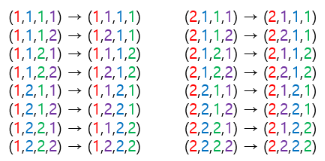
$$
out=
\begin{pmatrix}
\begin{pmatrix}
5&4 \\
3&2
\end{pmatrix}
&
\begin{pmatrix}
3&4 \\
2&3
\end{pmatrix} \\
\begin{pmatrix}
3&2 \\
3&3
\end{pmatrix}
&
\begin{pmatrix}
2&3 \\
5&5
\end{pmatrix}
\end{pmatrix}
$$
최종값은 13강 연습문제 2번에서 구한 4차원 텐서
$$
\begin{pmatrix}
\begin{pmatrix}
4&3 \\
2&1
\end{pmatrix}
&
\begin{pmatrix}
1&2 \\
0&1
\end{pmatrix} \\
\begin{pmatrix}
2&1 \\
2&2
\end{pmatrix}
&
\begin{pmatrix}
0&1 \\
3&3
\end{pmatrix}
\end{pmatrix}
$$
의 1열에 $b_1=1$을 2열에 $b_1=2$를 더한 것과 같습니다.

In [6]:
x = np.array([[[[1,1,1],[1,0,0],[1,0,0]],[[1,1,1],[0,0,1],[0,0,1]]],[[[1,0,0],[1,0,0],[1,1,1]],[[0,0,1],[0,0,1],[1,1,1]]]])
w = np.array([[[[1,0],[1,0]],[[1,1],[0,0]]],[[[0,1],[0,1]],[[0,0],[1,1]]]])
b=np.array([1,2])

FN, C, FH, FW = w.shape
N, C, H, W = x.shape
out_h = 1 + int((H + 2*pad - FH) / stride)
out_w = 1 + int((W + 2*pad - FW) / stride)

col = im2col(x, FH, FW, stride, pad)
print(col)

[[1. 1. 1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 1. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 1. 0. 0. 1. 1.]
 [0. 0. 1. 1. 0. 1. 1. 1.]]


In [7]:
col_W = w.reshape(FN, -1).T
print(col_W)

[[1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]]


In [8]:
out = np.dot(col, col_W) +b
print(out)

[[5. 3.]
 [4. 4.]
 [3. 2.]
 [2. 3.]
 [3. 2.]
 [2. 3.]
 [3. 5.]
 [3. 5.]]


In [9]:
out = out.reshape(N, out_h, out_w, -1)
print(out)

[[[[5. 3.]
   [4. 4.]]

  [[3. 2.]
   [2. 3.]]]


 [[[3. 2.]
   [2. 3.]]

  [[3. 5.]
   [3. 5.]]]]


In [10]:
out = out.transpose(0, 3, 1, 2)
print(out)

[[[[5. 4.]
   [3. 2.]]

  [[3. 4.]
   [2. 3.]]]


 [[[3. 2.]
   [3. 3.]]

  [[2. 3.]
   [5. 5.]]]]


**3. 교재의 im2col로 구현한 합성곱이 정의대로 구현한 합성곱에 비해 몇배나 빠른지 측정하려 한다.
균등분포를 따라 랜덤하게 데이터와 필터를 생성한 후 실험해보시오. 데이터의 포맷은 N$\times$C$\times$H$\times$W=100$\times$3$\times$100$\times$100으로 필터의 포맷은FN$\times$C$\times$FH$\times$FW=20$\times$3$\times$5$\times$5으로 잡으시오.**

In [11]:
import time
from common.layers import Convolution

input = np.random.rand(100,3,100,100)
filters = np.random.rand(20,3,5,5)
pad = 0
stride = 1

N, C, H, W = input.shape
FN, C, FH, FW = filters.shape
out_h = 1 + int((H + 2*pad - FH) / stride)
out_w = 1 + int((W + 2*pad - FW) / stride)

out = np.zeros((N, FN, out_h, out_w))

start_naive = time.time()

for i in range(N):
    for j in range(FN):
        for k in range(out_h):
            h_start = k * stride
            h_end = h_start + FH
            for l in range(out_w):
                w_start = l * stride
                w_end = w_start + FW
                out[i,j,k,l] = np.sum(input[i,:, h_start:h_end, w_start:w_end] * filters[j])

end_naive =  time.time()

conv_layer= Convolution(filters,0)

start_im2col = time.time()
conv_layer.forward(input)
end_im2col = time.time()

print((end_naive - start_naive)/(end_im2col - start_im2col))

157.65638023532534
